In [1]:
import lasagne
import theano

import matplotlib.pyplot as plt
import numpy as np
import theano.tensor as T

import time

Using gpu device 0: GeForce GTX 670 (CNMeM is enabled with initial size: 75.0% of memory, cuDNN 5005)
/home/krautcat/.local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
%matplotlib inline

## Создание нейросети

In [3]:
def build_cnn(input_var=None):
    
    net = {};
    
    net['input'] = lasagne.layers.InputLayer(
            shape = (None, 2), 
            input_var = input_var)
    
    net['dense'] = lasagne.layers.DenseLayer(
            net['input'],
            num_units = 1,
            nonlinearity = lasagne.nonlinearities.sigmoid,
            b = None)
    
    return net

## Подготовка нейросети

In [4]:
X = T.dmatrix('X')
y = T.dvector('y')

In [5]:
network = build_cnn(X)['dense']

In [6]:
predicted_y = T.flatten(lasagne.layers.get_output(network, X))

params = lasagne.layers.get_all_params(network, trainable=True)

loss = lasagne.objectives.aggregate(lasagne.objectives.binary_crossentropy(predicted_y, y))
acc = T.mean(T.eq(predicted_y, y))

cost = T.grad(loss, params)

learning_rate = 0.001

updates = lasagne.updates.sgd(cost, params, learning_rate=learning_rate)
    
# Functions    
train_fn = theano.function(
            inputs = [X, y], 
            outputs = [loss, acc],
            updates=updates,
            allow_input_downcast = True)

prediction_fn = theano.function(
            inputs = [X],
            outputs = T.flatten(predicted_y > 0.5),
            allow_input_downcast = True)

## Подготовка данных

In [18]:
n_objects = 1000
space_dim = 2

X_train = np.zeros((n_objects, space_dim))
y_train = np.zeros(n_objects)

X_train[:(n_objects // 2)] = np.random.randn(n_objects // 2, space_dim)
X_train[(n_objects // 2):] = np.random.randn(n_objects // 2, space_dim) + 2

y_train[:(n_objects // 2)] = 1

print(X_train)

for i in range(len(y_train)):
    if y_train[i]:
        plt.scatter(X_train[i,0],X_train[i,1], c='r')
    else:
        plt.scatter(X_train[i,0],X_train[i,1], c='b')
        
plt.show()

[[ 0.23148926  0.76820609]
 [-1.86364667  2.6814666 ]
 [ 0.77770424  0.25996163]
 ..., 
 [ 0.98693459  2.73403236]
 [ 2.67158803  2.89917341]
 [ 1.99840002  1.83558084]]


In [19]:
num_epochs = 50

Epoch: 0/50, loss: 0.515645981355, accuracy: 0.0, time: 0.00065803527832 sec
Epoch: 1/50, loss: 0.515624939033, accuracy: 0.0, time: 0.000710964202881 sec
Epoch: 2/50, loss: 0.515603906409, accuracy: 0.0, time: 0.000387191772461 sec
Epoch: 3/50, loss: 0.515582883981, accuracy: 0.0, time: 0.000382900238037 sec
Epoch: 4/50, loss: 0.515561871243, accuracy: 0.0, time: 0.000371932983398 sec
Epoch: 5/50, loss: 0.515540868189, accuracy: 0.0, time: 0.000420093536377 sec
Epoch: 6/50, loss: 0.515519874816, accuracy: 0.0, time: 0.000417947769165 sec
Epoch: 7/50, loss: 0.515498891119, accuracy: 0.0, time: 0.000607967376709 sec
Epoch: 8/50, loss: 0.515477917093, accuracy: 0.0, time: 0.000405788421631 sec
Epoch: 9/50, loss: 0.515456953235, accuracy: 0.0, time: 0.000609874725342 sec
Epoch: 10/50, loss: 0.515435999038, accuracy: 0.0, time: 0.000411987304688 sec
Epoch: 11/50, loss: 0.515415054499, accuracy: 0.0, time: 0.000432968139648 sec
Epoch: 12/50, loss: 0.515394113223, accuracy: 0.0, time: 0.0005

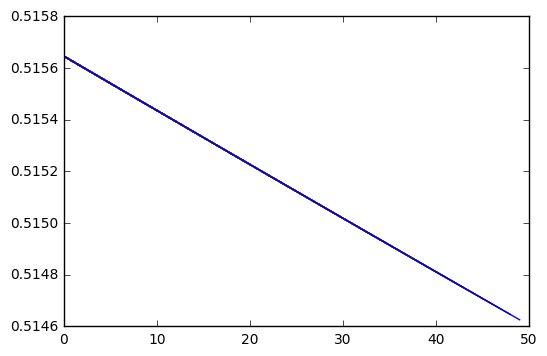

In [20]:
loss_history = []

for epoch in range(num_epochs):
    
    start_time = time.time()
    
    loss, acc = train_fn(X_train, y_train)
    loss_history.append(loss)
    
    print("Epoch: {}/{}, loss: {}, accuracy: {}, time: {} sec".format(
            epoch, num_epochs, loss, acc, time.time() - start_time))
        
    plt.plot(range(len(loss_history)), loss_history)

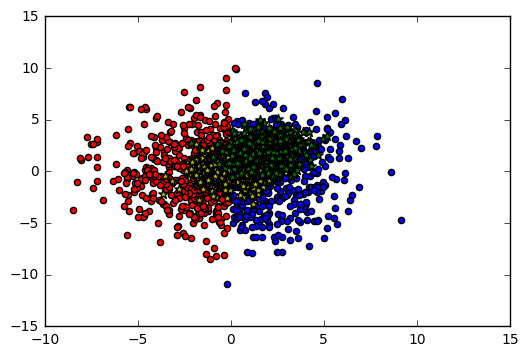

In [27]:
X_test = np.random.randn(n_objects, space_dim) * 3

y_test = prediction_fn(X_test)

# print(y_test)

for i in range(len(y_test)):
    if y_test[i] == 1:
        plt.scatter(X_test[i,0],X_test[i,1], c='r')
    else:
        plt.scatter(X_test[i,0],X_test[i,1], c='b')
        
for i in range(len(y_train)):
    if y_train[i] == 1:
        plt.scatter(X_train[i,0],X_train[i,1], c='y', marker='*', s=50)
    else:
        plt.scatter(X_train[i,0],X_train[i,1], c='g', marker='*', s=50)
    
plt.show()